# Web scraping

Sometimes the data you want is on a web page, instead of a machine-readable table. The process for extracting this information is called **web scraping**.

## General guidance

Web scraping has significant downsides:
* Error-prone
* Time-consuming
* Often forbidden by site terms of service

On the other hand, web scraping is often the *only* way to get access to a novel dataset. Consequently, web scraping projects are subject to the following constraints:

* The scrape-ee is not explicitly adversarial (e.g., competitor, government).
* Be courteous. Limit your requests, connections, download speeds, and total download size.

As a result:

* Always look for another way to get the data first. A polite email does wonders.
* Appropriate for datasets in the hundreds of megabytes. Web scraping becomes untenable for datasets around 1 GB.


## Our first web scrape

We all know about the web. Usually we use browsers to get web pages, but let's use Python instead.

In [126]:
from urllib.request import urlopen

In [127]:
url = "http://www.example.com"
fp = urlopen(url)
contents = fp.read()
contents

b'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #fff;\n        }\n        div {\n            width: auto;\n            margin: 0 auto;\n            border-radius: 0;\n            padding: 1em;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\

What just happened?

1. The `urlopen` function takes a URL and returns a file-like object.
2. The file-like object has a `read` method, which we can use to extact the contents of the web page.
3. Jupyter automatically printed the return value of the `read` method.

This is a very convenient way to fetch web pages using Python, but there's still work to be done.

### Web pages aren't delivered as text

The `read` method returns a **byte string**, as indicated by the `b'` at the beginning of the string. A byte string is a list of numbers between 0 and 255. Above, those numbers are represented with human-readable characters. For example 60 is printed as "<", 97 is printed as "a", and 10 is printed as "\n". 

The byte string may look like text, **but that is an unhelpful illusion**. In fact it would be more true and less confusing to print out the contents of the web page as a number:

In [128]:
contents.hex()

'3c21646f63747970652068746d6c3e0a3c68746d6c3e0a3c686561643e0a202020203c7469746c653e4578616d706c6520446f6d61696e3c2f7469746c653e0a0a202020203c6d65746120636861727365743d227574662d3822202f3e0a202020203c6d65746120687474702d65717569763d22436f6e74656e742d747970652220636f6e74656e743d22746578742f68746d6c3b20636861727365743d7574662d3822202f3e0a202020203c6d657461206e616d653d2276696577706f72742220636f6e74656e743d2277696474683d6465766963652d77696474682c20696e697469616c2d7363616c653d3122202f3e0a202020203c7374796c6520747970653d22746578742f637373223e0a20202020626f6479207b0a20202020202020206261636b67726f756e642d636f6c6f723a20236630663066323b0a20202020202020206d617267696e3a20303b0a202020202020202070616464696e673a20303b0a2020202020202020666f6e742d66616d696c793a20224f70656e2053616e73222c202248656c766574696361204e657565222c2048656c7665746963612c20417269616c2c2073616e732d73657269663b0a20202020202020200a202020207d0a20202020646976207b0a202020202020202077696474683a2036303070783b0a20202020202020206d617267696e3

This byte string needs to be **decoded** into text, using its `decode` method. If you do not provide an encoding name, `decode` defaults to `utf8`.

In [132]:
decoded_contents = contents.decode()
decoded_contents

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #fff;\n        }\n        div {\n            width: auto;\n            margin: 0 auto;\n            border-radius: 0;\n            padding: 1em;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n

By default, jupyter displays line breaks as "\n". If we want to see the text as it was meant to be seen, we need to use the `print` function.

In [133]:
print(decoded_contents)

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        body {
            background-color: #fff;
        }
        div {
            width: auto;
            margin: 0 auto;
            border-radius: 0;
            padding: 1em;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>This doma

### Web pages aren't delivered formatted

The contents of a web page is **source code**; usually a combination of HTML, CSS, and Javascript. It is the significant challenge of a web browser to convert this source code into an image of a web page. We won't attempt that; instead, we'll extract data directly from the source code, by searching and manipulating the source code string.

For example we could find the position of the `<title>` and `</title>` tags and extract everything between them.

In [142]:
start = decoded_contents.find("<title>")

In [144]:
end = decoded_contents.find("</title>")

In [147]:
decoded_contents[start+len("<title>"):end]

'Example Domain'

In [149]:
#hacknology alert: this is a built-in string method

start = decoded_contents.find("<title>")
end = decoded_contents.find("</title>")
decoded_contents[ start+len("<title>") : end ]

'Example Domain'

We did it! We scraped a piece of data from a web page. We'll get into more sophisticated ways to search the source code of a page. But first, we need to know a little bit about...

## The Hypertext Transfer Protocol

Stick with me here. Mostly we gloss over this, but understanding it is **essential** if you want to interact with the web programmatically.

Web pages are delivered as a result of an **exchange of messages** between your computer and the server. The medium for this exchange may vary, but it is almost always the Transmission Control Protocol or (TCP). The format for this conversation is the **Hypertext Transfer Protocol**, or HTTP.

It's totally possible to establish a TCP connection to a machine and send messages that do **not** conform to HTTP. Let's try it!

In [150]:
import socket

Open up a TCP connection to "www.example.com" port 80, which will be listening for connections from web clients. 

Send a random string which the server is not expecting, then read 1024 bytes of whatever it sends as a response.

In [151]:
s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect(("www.example.org", 80))
s.sendall(b"SENDING AN ARBITRARY STRING TO www.example.com")

# then read 1024 bytes of data from the connection
resp = s.recv(1024)
print( resp )
s.close()

b'HTTP/1.0 501 Not Implemented\r\nContent-Type: text/html\r\nContent-Length: 357\r\nConnection: close\r\nDate: Mon, 28 Jan 2019 21:54:37 GMT\r\nServer: ECSF (sjc/4FBB)\r\n\r\n<?xml version="1.0" encoding="iso-8859-1"?>\n<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"\n         "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">\n\t<head>\n\t\t<title>501 - Not Implemented</title>\n\t</head>\n\t<body>\n\t\t<h1>501 - Not Implemented</h1>\n\t</body>\n</html>\n'


The server sent a message - a series of bytes (which remember is **not** a text string) - and then closed the connection. Let's decode it and take a look at it.

In [152]:
print( resp.decode() )

HTTP/1.0 501 Not Implemented
Content-Type: text/html
Content-Length: 357
Connection: close
Date: Mon, 28 Jan 2019 21:54:37 GMT
Server: ECSF (sjc/4FBB)

<?xml version="1.0" encoding="iso-8859-1"?>
<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN"
         "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
	<head>
		<title>501 - Not Implemented</title>
	</head>
	<body>
		<h1>501 - Not Implemented</h1>
	</body>
</html>



The server responded with a proper HTTP-formattred response message saying, basically, "whatever you asked, I don't know how to do it."

Here's a very simple, barely valid message we can send:

```
GET / HTTP/1.1\r\n
Host: www.example.com\r\n
\r\n```

Let's just send it over the wire, and then listen for 4 kilobytes of data.

In [160]:
request = "GET / HTTP/1.1\r\nHost: www.example.com\r\n\r\n".encode('ascii')

In [161]:


s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
s.connect(("www.example.org", 80))
s.sendall(request)

resp = s.recv(4*1024)
print( resp )
s.close()

b'HTTP/1.1 200 OK\r\nCache-Control: max-age=604800\r\nContent-Type: text/html; charset=UTF-8\r\nDate: Mon, 28 Jan 2019 21:59:01 GMT\r\nEtag: "1541025663+ident"\r\nExpires: Mon, 04 Feb 2019 21:59:01 GMT\r\nLast-Modified: Fri, 09 Aug 2013 23:54:35 GMT\r\nServer: ECS (sjc/4EC1)\r\nVary: Accept-Encoding\r\nX-Cache: HIT\r\nContent-Length: 1270\r\n\r\n<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n    

Let's take a look at it, decoded and pretty-printed:

In [162]:
print( resp.decode() )

HTTP/1.1 200 OK
Cache-Control: max-age=604800
Content-Type: text/html; charset=UTF-8
Date: Mon, 28 Jan 2019 21:59:01 GMT
Etag: "1541025663+ident"
Expires: Mon, 04 Feb 2019 21:59:01 GMT
Last-Modified: Fri, 09 Aug 2013 23:54:35 GMT
Server: ECS (sjc/4EC1)
Vary: Accept-Encoding
X-Cache: HIT
Content-Length: 1270

<!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 50px;
        background-color: #fff;
        border-radius: 1em;
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @

We just sent a valid message message, called an **HTTP Request**, and received a valid response, called an **HTTP Response**.

### Breaking down the HTTP format

#### Request

At its most basic, an HTTP Request is simply a text message with the format:

```
[method] [path] HTTP/1.1
[list of key:value pairs each on their own line]
[blank line]
[optional body]
```

The `method` is the type of thing we're asking the server to do. The `path` is the location of the resources to be operated upon. The `list of key:value pairs` are called "headers"; they specify parameters for how the interaction will proceed. In some cases the server needs an additional payload of information; in such cases that information is included in the `body` section. Every line is terminated with a carriage return and line feed, `\r\n`.

In our example above, the `method` was `GET`, the `path` was `/`, we only had one header, `Host: www.example.com`, and there was no body.

#### Response

The response format is very similar, with a different first line.

```
HTTP/1.1 [status code] [message]
[list of key:value pairs each on their own line]
[blank line]
[optional body]
```

The `status code` is a standardized number for the type of response the server is delivering, along with a human-readable `message`.

In our example above, the status code is `200` with message `OK`. This was followed by a large number of headers; for example

```
Accept-Ranges: bytes
Cache-Control: max-age=604800
Content-Type: text/html; charset=UTF-8
```

Headers are arbitrary key/value string pairs separated by a `:` character; header key and value formats are a product of wildly varying convention. Some are very standard; for example `Content-Type` specifies the format of the response, in this case utf-8 encoded HTML.

Reponses *usually* (though not always) come with a body. In this case, it's the source code of the web page. The response body does not need to be HTML, or even text.

### Mid-lecture review

HTTP libraries (e.g. `http`, `urllib.request`) automate this messaging process, but assume an understanding of the underlying protocol (a so-called "leaky abstraction"). At this point you should be recognize the component ideas and how they relate:

* text encoding
* Transport Control Protocl (TCP)
* Hypertext Transfer Protocol (HTTP)
* request, response
* host
* method
* path
* headers
* body
* response code
* response message

## Using an http client library

In Python3, the most standard and basic http client library is `http`. A higher-level built-in alternative is `urllib`, as well as any number of installable libraries, eg `requests`.

In [163]:
from http.client import HTTPConnection

The connection is with a host and a port.

In [164]:
conn = HTTPConnection(host="www.example.com", port=80)

A request consists of a method and a path.

In [165]:
conn.request(method="GET", url="/")

A response in a bundle of information.

In [166]:
resp = conn.getresponse()

In [170]:
resp.code==200

True

In [171]:
headers = resp.headers

In [172]:
dict( headers )

{'Cache-Control': 'max-age=604800',
 'Content-Type': 'text/html; charset=UTF-8',
 'Date': 'Mon, 28 Jan 2019 22:08:09 GMT',
 'Etag': '"1541025663+gzip+ident"',
 'Expires': 'Mon, 04 Feb 2019 22:08:09 GMT',
 'Last-Modified': 'Fri, 09 Aug 2013 23:54:35 GMT',
 'Server': 'ECS (sjc/4F91)',
 'Vary': 'Accept-Encoding',
 'X-Cache': 'HIT',
 'Content-Length': '1270'}

In [175]:
headers["Content-Type"]

'text/html; charset=UTF-8'

Including the body, which we access by `read`ing the response.

In [176]:
response_body = resp.read()
response_body.decode()

'<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #fff;\n        }\n        div {\n            width: auto;\n            margin: 0 auto;\n            border-radius: 0;\n            padding: 1em;\n        }\n    }\n    </style>    \n</head>\n\n<body>\n<div>\n

### Detour to a familiar location: mongodb

Like Moses said: the unparsed content of a web site is worth celebrating by saving it. But **how**?

Most simple thing: just throw it into a file in a webscrape directory. But is this such a good idea if you're scraping **thousands** of pages?

Second most simple thing: shove it into a **mongodb**.

In [293]:
from pymongo import MongoClient

client = MongoClient()


In [294]:
db = client.test_database
collection = db.test_collection

In [295]:
idx = collection.insert_one( {'host':'www.example.com',
                              'path':"/", 
                              'headers':dict(headers),
                              'body':response_body.decode()} ).inserted_id

In [297]:
collection.insert({'foo':'bar'})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: insert is deprecated. Use insert_one or insert_many instead.
  """Entry point for launching an IPython kernel.


ObjectId('5c4fafc3da446ee075780a70')

In [300]:
list( collection.find({'foo':'bar'}) )

[{'_id': ObjectId('5c4fafc3da446ee075780a70'), 'foo': 'bar'}]

In [296]:
lazarus = collection.find_one({"_id":idx})
lazarus

{'_id': ObjectId('5c4fafb3da446ee075780a6f'),
 'host': 'www.example.com',
 'path': '/',
 'headers': {'user_agent': 'DataWrangling/1.1 (brandon.martinanderson@galvanize.com; dsi example exercise)'},
 'body': '<!doctype html>\n<html>\n<head>\n    <title>Example Domain</title>\n\n    <meta charset="utf-8" />\n    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />\n    <meta name="viewport" content="width=device-width, initial-scale=1" />\n    <style type="text/css">\n    body {\n        background-color: #f0f0f2;\n        margin: 0;\n        padding: 0;\n        font-family: "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;\n        \n    }\n    div {\n        width: 600px;\n        margin: 5em auto;\n        padding: 50px;\n        background-color: #fff;\n        border-radius: 1em;\n    }\n    a:link, a:visited {\n        color: #38488f;\n        text-decoration: none;\n    }\n    @media (max-width: 700px) {\n        body {\n            background-color: #

### Reading HTML: a beautiful soup

Now we know HTTP; let's use it to get data from HTTP servers! In the above example, we requested the document hosted by the `http` protocol at host `www.example.com`, port `80`, and path `/`, also known as "http://www.example.com/".

We received a response. But what is it? The first step is to look at the `Content-Type` header, which is almost always present in a HTTP response. In this case, it's:

```
text/html; charset=UTF-8
```

Indicating that we should interpret and parse the message body as an HTML document. Simple, right?

Not. So. Fast.

HTML isn't really a language, it's more like a **cloud of conventions**. Intepreting this **cloud** with a computer is a heavyweight task; it's a big reason why web browsers are such significant pieces of software.

In the world of Python, the weapon of choice is a library called `beautifulsoup`. Beautifulsoup4, (aka `bs4`) converts potentially poorly-formatted HTML code into a form that's convenient to query. Let's take a look at a simple example:

In [182]:
from bs4 import BeautifulSoup

In [185]:
soup = BeautifulSoup( response_body )

In [186]:
soup.title.text

'Example Domain'

In [190]:
soup.head.title.text

'Example Domain'

More detail: `beautifulsoup` converts the text string into a **parse tree** of elements, where the child elements are the subcomponents of the document:

In [191]:
for child in soup.children:
    print( type(child) )

<class 'bs4.element.Doctype'>
<class 'bs4.element.Tag'>
<class 'bs4.element.NavigableString'>


In practice, `beautifulsoup` is a big swiss army knife of tools for rummaging through an HTML document.

In [192]:
# find a single child element
soup.title

<title>Example Domain</title>

In [193]:
# find a single child element; it may contain its own children
soup.body

<body>
<div>
<h1>Example Domain</h1>
<p>This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.</p>
<p><a href="http://www.iana.org/domains/example">More information...</a></p>
</div>
</body>

In [195]:
# strips away markup from all children of a tag
bodytext = soup.body.text

In [197]:
print( bodytext )



Example Domain
This domain is established to be used for illustrative examples in documents. You may use this
    domain in examples without prior coordination or asking for permission.
More information...




In [198]:
# use attribute notation to get a child of a child
soup.body.h1

<h1>Example Domain</h1>

In [199]:
# find all children with a particular tag
soup.find_all('p')

[<p>This domain is established to be used for illustrative examples in documents. You may use this
     domain in examples without prior coordination or asking for permission.</p>,
 <p><a href="http://www.iana.org/domains/example">More information...</a></p>]

In [208]:
doc = BeautifulSoup("<html><body>hello world</body></html>")

In [216]:
list( list( list( doc.children )[0].children )[0].children )[0]

'hello world'

## Example: dog breeds

Go take a look at the dog breed size chart at the American Kennel Club website: https://www.akc.org/expert-advice/nutrition/breed-weight-chart/.

**breakout**
* What is the protocol?
* What is the host?
* What is the path?
* What is the method?
* What is the _query string_?

Let's do the thing together.

```https://en.wikipedia.org/w/api.php?format=json&action=query&prop=extracts&exintro&explaintext&redirects=1&titles=Stack%20Overflow```

In [219]:
from http.client import HTTPSConnection #note the S

In [220]:
conn = HTTPSConnection(host="www.akc.org")

In [221]:
conn.request(method="GET", url="/expert-advice/nutrition/breed-weight-chart/")

In [222]:
resp = conn.getresponse()

In [223]:
resp.headers["Content-Type"]

'text/html; charset=UTF-8'

In [224]:
body = resp.read()

In [225]:
resp.status

200

In [226]:
len(body)

240892

In [227]:
body[0:1000]

b'\n<!DOCTYPE html>\n<html lang="en">\n<head>\n    <meta charset="UTF-8"><script type="text/javascript">window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var o=n[t]={exports:{}};e[t][0].call(o.exports,function(n){var o=e[t][1][n];return r(o||n)},o,o.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var o=0;o<t.length;o++)r(t[o]);return r}({1:[function(e,n,t){function r(){}function o(e,n,t){return function(){return i(e,[c.now()].concat(u(arguments)),n?null:this,t),n?void 0:this}}var i=e("handle"),a=e(3),u=e(4),f=e("ee").get("tracer"),c=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","addToTrace","inlineHit","addRelease"],d="api-",l=d+"ixn-";a(p,function(e,n){s[n]=o(d+n,!0,"api")}),s.addPageAction=o(d+"addPageAction",!0),s.setCurrentRouteName=o(d+"routeName",!0),n.exports=newrelic,s.interaction=function(){return(new r).get()};v

Oh snap. Welcome to the howling maelstrom of madness that is the modern web.

But, then we have Beautiful Soup.

In [228]:
soup = BeautifulSoup(body)

**Demo using dev tools to find the target tag**

In [233]:
foo = soup.find("div", class_="content-body")

In [238]:
# get first 'div' with class 'content-body', then get the first table
atable = soup.find("div", class_="content-body").table

In [239]:
#[x.text for x in atable.find_all("tr")[1].find_all("td")]

In [244]:
rows = []
for row in atable.find_all('tr'):
    textrow = [x.text for x in row.find_all('td')]
    print( textrow )
    rows.append( textrow )

['Breed', 'Weight Male', 'Weight Female']
['Affenpinschers', '7-10 pounds', '7-10 pounds']
['Afghan Hounds', '50-60 pounds', '50-60 pounds']
['Airedale Terriers', '50-70 pounds', '50-70 pounds']
['Akitas', '100-130 pounds', '70-100 pounds']
['Alaskan Malamutes', '85 pounds', '75 pounds']
['American English Coonhounds', '45-65 pounds', '45-65 pounds']
['American Eskimo Dogs', '6-10 pounds (toy), 10-20 pounds (miniature), 25-35 pounds (standard)', '6-10 pounds (toy), 10-20 pounds (miniature), 25-35 pounds (standard)']
['American Foxhounds', '65-70 pounds', '60-65 pounds']
['American Hairless Terriers', '12-16 pounds', '12-16 pounds']
['American Staffordshire Terriers', '55-70 pounds', '40-55 pounds']
['Anatolian Shepherd Dogs', '110-150 pounds', '80-120 pounds']
['Australian Cattle Dogs', '35-50 pounds', '35-50 pounds']
['Australian Shepherds', '50-65 pounds', '40-55 pounds']
['Australian Terriers', '12-18 pounds', '12-18 pounds']
['Basenjis', '24 pounds', '22 pounds']
['Basset Hounds', 

In [245]:
rows[0:10]

[['Breed', 'Weight Male', 'Weight Female'],
 ['Affenpinschers', '7-10 pounds', '7-10 pounds'],
 ['Afghan Hounds', '50-60 pounds', '50-60 pounds'],
 ['Airedale Terriers', '50-70 pounds', '50-70 pounds'],
 ['Akitas', '100-130 pounds', '70-100 pounds'],
 ['Alaskan Malamutes', '85 pounds', '75 pounds'],
 ['American English Coonhounds', '45-65 pounds', '45-65 pounds'],
 ['American Eskimo Dogs',
  '6-10 pounds (toy), 10-20 pounds (miniature), 25-35 pounds (standard)',
  '6-10 pounds (toy), 10-20 pounds (miniature), 25-35 pounds (standard)'],
 ['American Foxhounds', '65-70 pounds', '60-65 pounds'],
 ['American Hairless Terriers', '12-16 pounds', '12-16 pounds']]

## Back to mongodb

Now we have some **semi-parsed** data from this page, which still needs a bunch of cleaning up. What's a good environment for saving semi-parsed data of uncertain format? **mongodb**.

In [246]:
client = MongoClient() #sensible defaults are sensible
db = client.test_database

dogs = db.dogs

In [247]:
dogs

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'test_database'), 'dogs')

In [255]:
idx = dogs.insert_one({'data':rows}).inserted_id

In [256]:
obj = dogs.find_one({"_id":idx})

In [257]:
obj

{'_id': ObjectId('5c4f8624da446ee075780a6d'),
 'data': [['Breed', 'Weight Male', 'Weight Female'],
  ['Affenpinschers', '7-10 pounds', '7-10 pounds'],
  ['Afghan Hounds', '50-60 pounds', '50-60 pounds'],
  ['Airedale Terriers', '50-70 pounds', '50-70 pounds'],
  ['Akitas', '100-130 pounds', '70-100 pounds'],
  ['Alaskan Malamutes', '85 pounds', '75 pounds'],
  ['American English Coonhounds', '45-65 pounds', '45-65 pounds'],
  ['American Eskimo Dogs',
   '6-10 pounds (toy), 10-20 pounds (miniature), 25-35 pounds (standard)',
   '6-10 pounds (toy), 10-20 pounds (miniature), 25-35 pounds (standard)'],
  ['American Foxhounds', '65-70 pounds', '60-65 pounds'],
  ['American Hairless Terriers', '12-16 pounds', '12-16 pounds'],
  ['American Staffordshire Terriers', '55-70 pounds', '40-55 pounds'],
  ['Anatolian Shepherd Dogs', '110-150 pounds', '80-120 pounds'],
  ['Australian Cattle Dogs', '35-50 pounds', '35-50 pounds'],
  ['Australian Shepherds', '50-65 pounds', '40-55 pounds'],
  ['Austral

With this the data has completed a round trip through mongodb.

In [260]:
rows = obj['data']

In [261]:
rows[0:4]

[['Breed', 'Weight Male', 'Weight Female'],
 ['Affenpinschers', '7-10 pounds', '7-10 pounds'],
 ['Afghan Hounds', '50-60 pounds', '50-60 pounds'],
 ['Airedale Terriers', '50-70 pounds', '50-70 pounds']]

## pandas is strange but useful

In [262]:
import pandas as pd

In [263]:
table = pd.DataFrame(data=rows[1:], columns=rows[0])
table

,Breed,Weight Male,Weight Female
0,Affenpinschers,7-10 pounds,7-10 pounds
1,Afghan Hounds,50-60 pounds,50-60 pounds
2,Airedale Terriers,50-70 pounds,50-70 pounds
3,Akitas,100-130 pounds,70-100 pounds
4,Alaskan Malamutes,85 pounds,75 pounds
5,American English Coonhounds,45-65 pounds,45-65 pounds
6,American Eskimo Dogs,"6-10 pounds (toy), 10-20 pounds (miniature), 2...","6-10 pounds (toy), 10-20 pounds (miniature), 2..."
7,American Foxhounds,65-70 pounds,60-65 pounds
8,American Hairless Terriers,12-16 pounds,12-16 pounds
9,American Staffordshire Terriers,55-70 pounds,40-55 pounds


## It doesn't have to be so hard

Some pages *want* to be scraped. We call them application programming interfaces, or APIs.

* https://www.mediawiki.org/wiki/API:Main_page
* https://en.wikipedia.org/wiki/Special:ApiSandbox#action=query&prop=extracts&format=json&exintro=&titles=Stack%20Overflow

For example, there's this:

`https://en.wikipedia.org/w/api.php?action=query&titles=Main_Page&prop=pageviews&format=json`




In [264]:
wikiurl = "https://en.wikipedia.org/w/api.php?action=query&titles=Main_Page&prop=pageviews&format=json"

Which is short for:
* Protocol: `https`
* Host: `en.wikipedia.org`
* Port: `80` (default)
* Method: `GET` (default)
* Path: `/w/api.php`
* Query String: `action=query&titles=Main_Page&prop=pageviews&format=json`
* Body: default none
* Headers: whatever your user agent picks

In [265]:
host = "en.wikipedia.org"
path = "/w/api.php?action=query&titles=Main_Page&prop=pageviews&format=json"
headers = {'user_agent': 'DataWrangling/1.1 (brandon.martinanderson@galvanize.com; dsi example exercise)'}
method = "GET"

In [266]:
# some useful libraries
from http.client import HTTPSConnection
import json

Create a connection.

In [267]:
conn = HTTPSConnection(host)

Send a request to the HTTP server. This sends the first line, the headers, and any body.

In [268]:
conn.request(method=method, url=path, headers=headers)

Wait for a response. This must be executed **immediately after** sending the request, before the server times out and closes the connection.

In [269]:
resp = conn.getresponse()

At this point you've read from the connection up until the end of the headers, but the connection is **still open**. We have to do a thing real quick:



In [270]:
respbody = resp.read()

While the connection was open we had to actually read the message body until the end, when (by default) the server closes thre connection.

At this point we're all done. We're no longer communicating with the server and the clock is no longer ticking. We can inspect the results of the communication at our leisure.

Here's the status. If all went well, it should be `200`.

In [271]:
resp.status

200

And the response headers, helpfully parsed from their raw form into a string:string dictionary.

In [272]:
dict( resp.headers )

{'Date': 'Mon, 28 Jan 2019 22:48:26 GMT',
 'Content-Type': 'application/json; charset=utf-8',
 'Content-Length': '1485',
 'Connection': 'keep-alive',
 'Server': 'mw1224.eqiad.wmnet',
 'X-Powered-By': 'HHVM/3.18.6-dev',
 'P3P': 'CP="This is not a P3P policy! See https://en.wikipedia.org/wiki/Special:CentralAutoLogin/P3P for more info."',
 'Cache-control': 'private, must-revalidate, max-age=0',
 'Content-Disposition': 'inline; filename=api-result.json',
 'X-Content-Type-Options': 'nosniff',
 'X-Frame-Options': 'SAMEORIGIN',
 'Backend-Timing': 'D=35818 t=1548715706708207',
 'Vary': 'Accept-Encoding,Treat-as-Untrusted,X-Forwarded-Proto,Cookie,Authorization,X-Seven',
 'X-Varnish': '567801778, 670691897, 380923116, 543276785',
 'Via': '1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1), 1.1 varnish (Varnish/5.1)',
 'Accept-Ranges': 'bytes',
 'Age': '0',
 'X-Cache': 'cp1081 pass, cp2001 pass, cp4032 pass, cp4030 pass',
 'X-Cache-Status': 'pass',
 'Server-Timing': 

The response body, in its raw bytestring form.

In [273]:
respbody.hex()

'7b226261746368636f6d706c657465223a22222c227175657279223a7b226e6f726d616c697a6564223a5b7b2266726f6d223a224d61696e5f50616765222c22746f223a224d61696e2050616765227d5d2c227061676573223a7b223135353830333734223a7b22706167656964223a31353538303337342c226e73223a302c227469746c65223a224d61696e2050616765222c22706167657669657773223a7b22323031382d31312d3238223a31373037393837342c22323031382d31312d3239223a31353431393438372c22323031382d31312d3330223a31333437333738392c22323031382d31322d3031223a31363236393331332c22323031382d31322d3032223a31363337343532352c22323031382d31322d3033223a31383837383236312c22323031382d31322d3034223a31363935353130332c22323031382d31322d3035223a31373433343239362c22323031382d31322d3036223a31373236343733322c22323031382d31322d3037223a31353635353437362c22323031382d31322d3038223a31363537323232382c22323031382d31322d3039223a31363138373634392c22323031382d31322d3130223a31383934363834372c22323031382d31322d3131223a31373730373038302c22323031382d31322d3132223a31363838343537322c22323031382d31322

We could bow to convention and print its pseudo-decoded ASCII representation:

In [274]:
respbody

b'{"batchcomplete":"","query":{"normalized":[{"from":"Main_Page","to":"Main Page"}],"pages":{"15580374":{"pageid":15580374,"ns":0,"title":"Main Page","pageviews":{"2018-11-28":17079874,"2018-11-29":15419487,"2018-11-30":13473789,"2018-12-01":16269313,"2018-12-02":16374525,"2018-12-03":18878261,"2018-12-04":16955103,"2018-12-05":17434296,"2018-12-06":17264732,"2018-12-07":15655476,"2018-12-08":16572228,"2018-12-09":16187649,"2018-12-10":18946847,"2018-12-11":17707080,"2018-12-12":16884572,"2018-12-13":15446322,"2018-12-14":14640903,"2018-12-15":16032729,"2018-12-16":15938708,"2018-12-17":18447120,"2018-12-18":16859230,"2018-12-19":16529561,"2018-12-20":15559163,"2018-12-21":14068023,"2018-12-22":16388617,"2018-12-23":16034921,"2018-12-24":18000379,"2018-12-25":15757346,"2018-12-26":16795736,"2018-12-27":16582890,"2018-12-28":14906247,"2018-12-29":16670166,"2018-12-30":16667106,"2018-12-31":18298079,"2019-01-01":16865930,"2019-01-02":16923511,"2019-01-03":16666430,"2019-01-04":15274054,"

And then perform the necessary magic to imbue it with meaning into human-readable string form, via `decode`.

**TIRESOME NOTE**: It is a **coincidence** in this case that the ASCII form looks a lot like the human-readable string. In many cases, the pre-decoded string is **not** readable, or is **sort of** readable but weird and confusing. You'll thank me on NLP week.

In [275]:
jsonstring = respbody.decode()

In [276]:
jsonstring

'{"batchcomplete":"","query":{"normalized":[{"from":"Main_Page","to":"Main Page"}],"pages":{"15580374":{"pageid":15580374,"ns":0,"title":"Main Page","pageviews":{"2018-11-28":17079874,"2018-11-29":15419487,"2018-11-30":13473789,"2018-12-01":16269313,"2018-12-02":16374525,"2018-12-03":18878261,"2018-12-04":16955103,"2018-12-05":17434296,"2018-12-06":17264732,"2018-12-07":15655476,"2018-12-08":16572228,"2018-12-09":16187649,"2018-12-10":18946847,"2018-12-11":17707080,"2018-12-12":16884572,"2018-12-13":15446322,"2018-12-14":14640903,"2018-12-15":16032729,"2018-12-16":15938708,"2018-12-17":18447120,"2018-12-18":16859230,"2018-12-19":16529561,"2018-12-20":15559163,"2018-12-21":14068023,"2018-12-22":16388617,"2018-12-23":16034921,"2018-12-24":18000379,"2018-12-25":15757346,"2018-12-26":16795736,"2018-12-27":16582890,"2018-12-28":14906247,"2018-12-29":16670166,"2018-12-30":16667106,"2018-12-31":18298079,"2019-01-01":16865930,"2019-01-02":16923511,"2019-01-03":16666430,"2019-01-04":15274054,"2

Parse the JSON string into a Python-native dictionary.

In [279]:
data = json.loads( jsonstring )

In [280]:
data

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'Main_Page', 'to': 'Main Page'}],
  'pages': {'15580374': {'pageid': 15580374,
    'ns': 0,
    'title': 'Main Page',
    'pageviews': {'2018-11-28': 17079874,
     '2018-11-29': 15419487,
     '2018-11-30': 13473789,
     '2018-12-01': 16269313,
     '2018-12-02': 16374525,
     '2018-12-03': 18878261,
     '2018-12-04': 16955103,
     '2018-12-05': 17434296,
     '2018-12-06': 17264732,
     '2018-12-07': 15655476,
     '2018-12-08': 16572228,
     '2018-12-09': 16187649,
     '2018-12-10': 18946847,
     '2018-12-11': 17707080,
     '2018-12-12': 16884572,
     '2018-12-13': 15446322,
     '2018-12-14': 14640903,
     '2018-12-15': 16032729,
     '2018-12-16': 15938708,
     '2018-12-17': 18447120,
     '2018-12-18': 16859230,
     '2018-12-19': 16529561,
     '2018-12-20': 15559163,
     '2018-12-21': 14068023,
     '2018-12-22': 16388617,
     '2018-12-23': 16034921,
     '2018-12-24': 18000379,
     '2018-12-25': 15757346,


JSON stands for JavaScript Object Notation; it was originally meant for shuffling data between Javascript programs. The importance of dictionaries in Javascript is shared by Python (and Ruby and Swift & most modern imperative languages). This makes JSON a natural fit, because it's terse and human-readable and dovetails well with many programming languages.

Parsed JSON objects are Python dictionaries, that can contain:
* Dictionaries
* Lists
* Strings
* Integers
* Floats

Let's take a looksee.

In [282]:
data

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'Main_Page', 'to': 'Main Page'}],
  'pages': {'15580374': {'pageid': 15580374,
    'ns': 0,
    'title': 'Main Page',
    'pageviews': {'2018-11-28': 17079874,
     '2018-11-29': 15419487,
     '2018-11-30': 13473789,
     '2018-12-01': 16269313,
     '2018-12-02': 16374525,
     '2018-12-03': 18878261,
     '2018-12-04': 16955103,
     '2018-12-05': 17434296,
     '2018-12-06': 17264732,
     '2018-12-07': 15655476,
     '2018-12-08': 16572228,
     '2018-12-09': 16187649,
     '2018-12-10': 18946847,
     '2018-12-11': 17707080,
     '2018-12-12': 16884572,
     '2018-12-13': 15446322,
     '2018-12-14': 14640903,
     '2018-12-15': 16032729,
     '2018-12-16': 15938708,
     '2018-12-17': 18447120,
     '2018-12-18': 16859230,
     '2018-12-19': 16529561,
     '2018-12-20': 15559163,
     '2018-12-21': 14068023,
     '2018-12-22': 16388617,
     '2018-12-23': 16034921,
     '2018-12-24': 18000379,
     '2018-12-25': 15757346,


At this point, there's no need for special libraries. We can navigate this Python object with Python syntax.

In [283]:
data['query']

{'normalized': [{'from': 'Main_Page', 'to': 'Main Page'}],
 'pages': {'15580374': {'pageid': 15580374,
   'ns': 0,
   'title': 'Main Page',
   'pageviews': {'2018-11-28': 17079874,
    '2018-11-29': 15419487,
    '2018-11-30': 13473789,
    '2018-12-01': 16269313,
    '2018-12-02': 16374525,
    '2018-12-03': 18878261,
    '2018-12-04': 16955103,
    '2018-12-05': 17434296,
    '2018-12-06': 17264732,
    '2018-12-07': 15655476,
    '2018-12-08': 16572228,
    '2018-12-09': 16187649,
    '2018-12-10': 18946847,
    '2018-12-11': 17707080,
    '2018-12-12': 16884572,
    '2018-12-13': 15446322,
    '2018-12-14': 14640903,
    '2018-12-15': 16032729,
    '2018-12-16': 15938708,
    '2018-12-17': 18447120,
    '2018-12-18': 16859230,
    '2018-12-19': 16529561,
    '2018-12-20': 15559163,
    '2018-12-21': 14068023,
    '2018-12-22': 16388617,
    '2018-12-23': 16034921,
    '2018-12-24': 18000379,
    '2018-12-25': 15757346,
    '2018-12-26': 16795736,
    '2018-12-27': 16582890,
    '20

In [284]:
pageviews = data['query']['pages']['15580374']['pageviews']
pageviews

{'2018-11-28': 17079874,
 '2018-11-29': 15419487,
 '2018-11-30': 13473789,
 '2018-12-01': 16269313,
 '2018-12-02': 16374525,
 '2018-12-03': 18878261,
 '2018-12-04': 16955103,
 '2018-12-05': 17434296,
 '2018-12-06': 17264732,
 '2018-12-07': 15655476,
 '2018-12-08': 16572228,
 '2018-12-09': 16187649,
 '2018-12-10': 18946847,
 '2018-12-11': 17707080,
 '2018-12-12': 16884572,
 '2018-12-13': 15446322,
 '2018-12-14': 14640903,
 '2018-12-15': 16032729,
 '2018-12-16': 15938708,
 '2018-12-17': 18447120,
 '2018-12-18': 16859230,
 '2018-12-19': 16529561,
 '2018-12-20': 15559163,
 '2018-12-21': 14068023,
 '2018-12-22': 16388617,
 '2018-12-23': 16034921,
 '2018-12-24': 18000379,
 '2018-12-25': 15757346,
 '2018-12-26': 16795736,
 '2018-12-27': 16582890,
 '2018-12-28': 14906247,
 '2018-12-29': 16670166,
 '2018-12-30': 16667106,
 '2018-12-31': 18298079,
 '2019-01-01': 16865930,
 '2019-01-02': 16923511,
 '2019-01-03': 16666430,
 '2019-01-04': 15274054,
 '2019-01-05': 16712678,
 '2019-01-06': 16488079,


And since we're already in Python land, we can do Pandas stuff.

In [285]:
import pandas as pd
from matplotlib import pyplot as plt

In [286]:
series = pd.Series( pageviews )

In [287]:
# explicitly convert the index to pandas.datetime type
series.index = pd.to_datetime( series.index )

In [289]:
series

2018-11-28    17079874
2018-11-29    15419487
2018-11-30    13473789
2018-12-01    16269313
2018-12-02    16374525
2018-12-03    18878261
2018-12-04    16955103
2018-12-05    17434296
2018-12-06    17264732
2018-12-07    15655476
2018-12-08    16572228
2018-12-09    16187649
2018-12-10    18946847
2018-12-11    17707080
2018-12-12    16884572
2018-12-13    15446322
2018-12-14    14640903
2018-12-15    16032729
2018-12-16    15938708
2018-12-17    18447120
2018-12-18    16859230
2018-12-19    16529561
2018-12-20    15559163
2018-12-21    14068023
2018-12-22    16388617
2018-12-23    16034921
2018-12-24    18000379
2018-12-25    15757346
2018-12-26    16795736
2018-12-27    16582890
2018-12-28    14906247
2018-12-29    16670166
2018-12-30    16667106
2018-12-31    18298079
2019-01-01    16865930
2019-01-02    16923511
2019-01-03    16666430
2019-01-04    15274054
2019-01-05    16712678
2019-01-06    16488079
2019-01-07    19745929
2019-01-08    17345085
2019-01-09    16378043
2019-01-10 

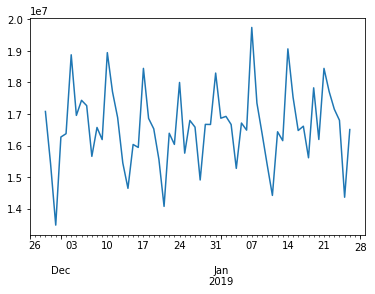

In [290]:
# which gives is some stuff for free: eg, nice x label
series.plot()

## When you're in a hurry

How to do art
1. know the rules
2. then break them, with elan

Here's how to transact an HTTP message sequence and decode the response in a single line.

In [291]:
from urllib.request import urlopen
datachunk = json.loads(urlopen(wikiurl).read().decode()) #so fresh so clean
datachunk

{'batchcomplete': '',
 'query': {'normalized': [{'from': 'Main_Page', 'to': 'Main Page'}],
  'pages': {'15580374': {'pageid': 15580374,
    'ns': 0,
    'title': 'Main Page',
    'pageviews': {'2018-11-28': 17079874,
     '2018-11-29': 15419487,
     '2018-11-30': 13473789,
     '2018-12-01': 16269313,
     '2018-12-02': 16374525,
     '2018-12-03': 18878261,
     '2018-12-04': 16955103,
     '2018-12-05': 17434296,
     '2018-12-06': 17264732,
     '2018-12-07': 15655476,
     '2018-12-08': 16572228,
     '2018-12-09': 16187649,
     '2018-12-10': 18946847,
     '2018-12-11': 17707080,
     '2018-12-12': 16884572,
     '2018-12-13': 15446322,
     '2018-12-14': 14640903,
     '2018-12-15': 16032729,
     '2018-12-16': 15938708,
     '2018-12-17': 18447120,
     '2018-12-18': 16859230,
     '2018-12-19': 16529561,
     '2018-12-20': 15559163,
     '2018-12-21': 14068023,
     '2018-12-22': 16388617,
     '2018-12-23': 16034921,
     '2018-12-24': 18000379,
     '2018-12-25': 15757346,


All of this opens the possibility of THIS one-liner:

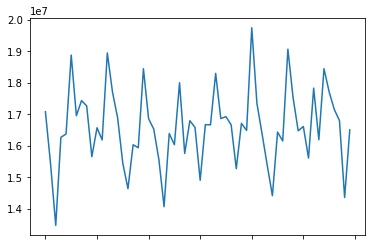

In [292]:
pd.Series( json.loads(urlopen(wikiurl).read().decode())["query"]["pages"]["15580374"]["pageviews"] ).plot()
